**A.Data Exploration and preparation**

In [ ]:
import pandas as pd

# Load training data
train_data = pd.read_csv('mnist_train.csv')

# Display basic information about the dataset
print(train_data.info())

# Display the first few rows of the dataset
print(train_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Columns: 785 entries, label to 28x28
dtypes: float64(69), int64(716)
memory usage: 10.3 MB
None
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2      4    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
4      9    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 78

In [ ]:
#Identify the number of unique classes
num_classes = train_data['label'].nunique()
print("Number of unique classes:", num_classes)


Number of unique classes: 10


In [ ]:
#Identify the number of features
num_features = len(train_data.columns) - 1  # Exclude the label column
print("Number of features:", num_features)


Number of features: 784


In [ ]:
#Checking Missing values
print("Missing values:\n", train_data.isnull().sum())


Missing values:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    1
28x25    1
28x26    1
28x27    1
28x28    1
Length: 785, dtype: int64


In [ ]:
# Normalize each image by dividing each pixel by 255
train_data.iloc[:, 1:] /= 255.0


<ipython-input-9-8eb1eed14a4e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:, 1:] /= 255.0


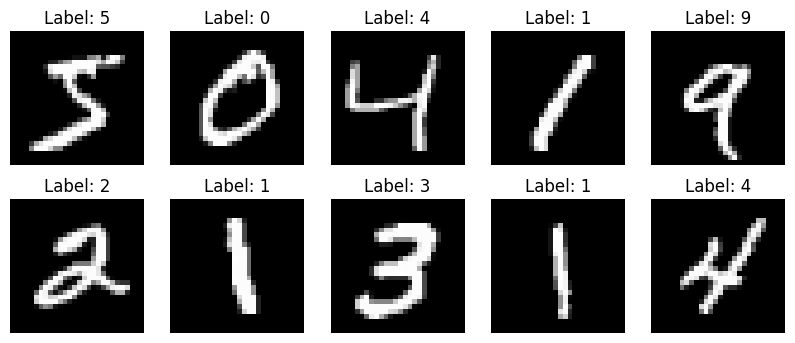

In [ ]:
import matplotlib.pyplot as plt

# Display a few images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    axes[i // 5, i % 5].imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    axes[i // 5, i % 5].set_title(f"Label: {train_data.iloc[i, 0]}")
    axes[i // 5, i % 5].axis('off')

plt.show()


In [ ]:
#Split the training data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:, 1:], train_data['label'], test_size=0.2, random_state=42)


In [ ]:
#drop na values
# Drop rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Adjust y_train accordingly
# Drop NaN values from the validation set
X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Adjust y_val accordingly






In [ ]:
import pandas as pd

# Load testing data
test_data = pd.read_csv('mnist_test.csv')

# Extract features and labels
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']




**B.Experiments and results**

In [ ]:
#KNN with with grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize K-NN classifier
knn = KNeighborsClassifier()

# Define parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on validation set
y_val_pred = grid_search.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))




Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.8894612996419659
Validation Accuracy: 0.8898550724637682


In [ ]:
#ANN
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, accuracy_score

# Define and train the first ANN architecture
model_1 = models.Sequential([
    layers.Flatten(input_shape=(28 , 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train.values.reshape(-1, 28, 28), y_train, epochs=10, validation_data=(X_val.values.reshape(-1, 28, 28), y_val))

# Define and train the second ANN architecture
model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train.values.reshape(-1, 28, 28), y_train, epochs=10, validation_data=(X_val.values.reshape(-1, 28, 28), y_val))

# Compare the outcomes of the two architectures
val_accuracy_1 = history_1.history['val_accuracy'][-1]
val_accuracy_2 = history_2.history['val_accuracy'][-1]

print("Validation Accuracy - Architecture 1:", val_accuracy_1)
print("Validation Accuracy - Architecture 2:", val_accuracy_2)

# Choose the model with the highest validation accuracy
best_architecture = model_1 if val_accuracy_1 > val_accuracy_2 else model_2




Epoch 1/10
43/43 [==============================] - 1s 7ms/step - loss: 1.5278 - accuracy: 0.6073 - val_loss: 0.9759 - val_accuracy: 0.7681
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.8415 - val_loss: 0.6391 - val_accuracy: 0.8319
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.8880 - val_loss: 0.5489 - val_accuracy: 0.8609
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.9193 - val_loss: 0.4952 - val_accuracy: 0.8667
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.9345 - val_loss: 0.4732 - val_accuracy: 0.8493
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9404 - val_loss: 0.4380 - val_accuracy: 0.8696
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9527 - val_loss: 0.4463 - val_accuracy: 0.8638
Epoch 8/10
43/43 [==

In [ ]:
# Iterate over hyperparameters
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to create an ANN with specified parameters
def create_ann(hidden_neurons, input_shape=(28, 28)):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(hidden_neurons, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate if needed
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List of hyperparameters to explore for the first architecture
hidden_neurons_list_1 = [64, 128]
learning_rates_list_1 = [0.001, 0.01]
batch_sizes_list_1 = [32, 64]

# List of hyperparameters to explore for the second architecture
hidden_neurons_list_2 = [128, 256]
learning_rates_list_2 = [0.001, 0.01]
batch_sizes_list_2 = [64, 128]

best_val_accuracy_1 = 0
best_ann_model_1 = None

best_val_accuracy_2 = 0
best_ann_model_2 = None

# Iterate over hyperparameters for the first architecture
for hidden_neurons in hidden_neurons_list_1:
    for learning_rate in learning_rates_list_1:
        for batch_size in batch_sizes_list_1:
            # Create and train the ANN
            ann_model = create_ann(hidden_neurons)
            history = ann_model.fit(
                X_train.values.reshape(-1, 28, 28), y_train,
                epochs=10, batch_size=batch_size,
                validation_data=(X_val.values.reshape(-1, 28, 28), y_val),
                verbose=0
            )

            # Evaluate on the validation set
            val_accuracy = history.history['val_accuracy'][-1]
            print(f"Architecture 1 - Hidden Neurons: {hidden_neurons}, Learning Rate: {learning_rate}, Batch Size: {batch_size}, Validation Accuracy: {val_accuracy:.4f}")

            # Compare and update the best model for the first architecture
            if val_accuracy > best_val_accuracy_1:
                best_val_accuracy_1 = val_accuracy
                best_ann_model_1 = ann_model

# Iterate over hyperparameters for the second architecture
for hidden_neurons in hidden_neurons_list_2:
    for learning_rate in learning_rates_list_2:
        for batch_size in batch_sizes_list_2:
            # Create and train the ANN
            ann_model = create_ann(hidden_neurons)
            history = ann_model.fit(
                X_train.values.reshape(-1, 28, 28), y_train,
                epochs=10, batch_size=batch_size,
                validation_data=(X_val.values.reshape(-1, 28, 28), y_val),
                verbose=0
            )

            # Evaluate on the validation set
            val_accuracy = history.history['val_accuracy'][-1]
            print(f"Architecture 2 - Hidden Neurons: {hidden_neurons}, Learning Rate: {learning_rate}, Batch Size: {batch_size}, Validation Accuracy: {val_accuracy:.4f}")

            # Compare and update the best model for the second architecture
            if val_accuracy > best_val_accuracy_2:
                best_val_accuracy_2 = val_accuracy
                best_ann_model_2 = ann_model

# Compare outcomes of the two architectures
print("Validation Accuracy - Architecture 1:", best_val_accuracy_1)
print("Validation Accuracy - Architecture 2:", best_val_accuracy_2)

# Choose the best model from the two architectures based on validation accuracy
best_architecture = best_ann_model_1 if best_val_accuracy_1 > best_val_accuracy_2 else best_ann_model_2




Architecture 1 - Hidden Neurons: 64, Learning Rate: 0.001, Batch Size: 32, Validation Accuracy: 0.8783
Architecture 1 - Hidden Neurons: 64, Learning Rate: 0.001, Batch Size: 64, Validation Accuracy: 0.8464
Architecture 1 - Hidden Neurons: 64, Learning Rate: 0.01, Batch Size: 32, Validation Accuracy: 0.8841
Architecture 1 - Hidden Neurons: 64, Learning Rate: 0.01, Batch Size: 64, Validation Accuracy: 0.8812
Architecture 1 - Hidden Neurons: 128, Learning Rate: 0.001, Batch Size: 32, Validation Accuracy: 0.8899
Architecture 1 - Hidden Neurons: 128, Learning Rate: 0.001, Batch Size: 64, Validation Accuracy: 0.8812
Architecture 1 - Hidden Neurons: 128, Learning Rate: 0.01, Batch Size: 32, Validation Accuracy: 0.8754
Architecture 1 - Hidden Neurons: 128, Learning Rate: 0.01, Batch Size: 64, Validation Accuracy: 0.8986
Architecture 2 - Hidden Neurons: 128, Learning Rate: 0.001, Batch Size: 64, Validation Accuracy: 0.8870
Architecture 2 - Hidden Neurons: 128, Learning Rate: 0.001, Batch Size: 

In [ ]:
# Get the confusion matrix of the best model
y_val_pred_best_prob = best_architecture.predict(X_val.values.reshape(-1, 28, 28))
y_val_pred_best = tf.argmax(y_val_pred_best_prob, axis=1)

conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
print("Confusion Matrix for the Best Model:\n", conf_matrix_best)


11/11 [==============================] - 0s 3ms/step
Confusion Matrix for the Best Model:
 [[30  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  1  0  1  0]
 [ 0  0  1 31  0  4  0  1  0  0]
 [ 0  1  0  0 36  0  1  0  1  2]
 [ 0  0  0  0  0 27  0  0  0  3]
 [ 1  0  0  0  0  1 26  0  0  0]
 [ 0  2  1  0  0  0  0 38  0  4]
 [ 1  4  1  0  0  2  0  0 18  0]
 [ 0  0  0  1  0  0  0  1  0 34]]


In [ ]:
# Assuming you have the best K-NN model (`grid_search`) and the best ANN model (`best_ann_model`) from previous experiments

# Validation accuracy for K-NN
accuracy_knn_val = grid_search.best_score_

# Validation accuracy for ANN
accuracy_ann_val = best_val_accuracy  # Use the variable you defined in your ANN experiment

# Print the validation accuracies
print("Validation Accuracy - K-NN:", accuracy_knn_val)
print("Validation Accuracy - ANN:", accuracy_ann_val)

# Compare the outcomes and determine which approach yields the highest accuracy
if accuracy_knn_val > accuracy_ann_val:
    print("K-NN has a higher accuracy on the validation dataset.")
else:
    print("ANN has a higher accuracy on the validation dataset.")


Validation Accuracy - K-NN: 0.8894612996419659
Validation Accuracy - ANN: 0.8985507488250732
ANN has a higher accuracy on the validation dataset.


In [ ]:
# Save the best model
best_architecture.save('best_architecture.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Reload the saved model
loaded_model = tf.keras.models.load_model('best_architecture.h5')

In [ ]:
# Use the reloaded model on the testing data
y_test_pred_prob = loaded_model.predict(X_test.values.reshape(-1, 28, 28))
y_test_pred = tf.argmax(y_test_pred_prob, axis=1)
# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_data['label'], y_test_pred)
print("Test Accuracy for the Best Model:", test_accuracy)


313/313 [==============================] - 1s 2ms/step
Test Accuracy for the Best Model: 0.8825
